In [130]:
import math
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [131]:
tcr_columns_chain = {'TRA':['a_cdr3aa','a_v','a_j'],'TRB':['b_cdr3aa','b_v','b_j'],'TRA_TRB':['a_cdr3aa','a_v','a_j', 'b_cdr3aa','b_v','b_j']}

In [132]:
results_path = 'data/example/'

In [133]:
chain = 'TRA_TRB'

In [134]:
label='antigen.epitope'

In [154]:
!python tcremp/tcremp_run.py -i data/example/VDJdb_data_paired_example.csv -c TRA_TRB -o data/example/results -n 10 -l antigen.epitope

Namespace(input='data/example/VDJdb_data_paired_example.csv', output='data/example/results', prefix=None, index_col=None, chain='TRA_TRB', prototypes_path=None, n_prototypes=10, species='HomoSapiens', unique_clonotypes=None, random_seed=42, cluster_algo='DBSCAN', labels_col='antigen.epitope')
[2024-11-19 05:14:48,236	root	INFO] Running TCRemP for i="/Users/mikesh/vcs/tcremp/data/example/VDJdb_data_paired_example.csv", writing to o="/Users/mikesh/vcs/tcremp/data/example/results/" under prefix="VDJdb_data_paired_example"
[2024-11-19 05:14:48,236	root	INFO] Loading data and initializing the pipeline
[2024-11-19 05:14:48,250	root	DEBUG] Will use 10 prototypes
[2024-11-19 05:14:48,250	root	DEBUG] Using antigen.epitope as clonotype labels
[2024-11-19 05:14:48,324	root	INFO] Checking input and extracting clonotypes
[2024-11-19 05:14:48,347	root	INFO] Clonotypes extraction time: 0.022549867630004883
Stage: Distance scores calculation
[2024-11-19 05:14:48,361	root	INFO] parse data for mir: 0.01

## Data desc

In [136]:
data = pd.read_csv('data/example/VDJdb_data_paired_example.csv', sep='\t')
data.head(10)

,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,d.beta,b_j,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,clonotype_index
0,NaN,NaN,NaN,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,385
1,NaN,NaN,NaN,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,386
2,NaN,NaN,NaN,CASSPLFGTSGGETYYF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,387
3,NaN,NaN,NaN,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,388
4,NaN,NaN,NaN,CASSPQTGASYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,389
5,NaN,NaN,NaN,CASSLVGGRYGYTF,TRBV12-3*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,390
6,NaN,NaN,NaN,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,391
7,NaN,NaN,NaN,CASSPATGTIYGYTF,TRBV6-5*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,392
8,NaN,NaN,NaN,CASSLTSGSPDTQYF,TRBV27*01,NaN,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:12165524,393
9,NaN,NaN,NaN,CASSYQTGAAYGYTF,TRBV6-5*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:21135165,887


In [137]:
print(f"Unique TRA clonotypes: {len(data[tcr_columns_chain['TRA']].drop_duplicates())-1}")
print(f"Unique TRB clonotypes: {len(data[tcr_columns_chain['TRA']].drop_duplicates())-1}")
print(f"Unique paired clonotypes: {len(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'].isna())][tcr_columns_chain['TRA'] + tcr_columns_chain['TRB']].drop_duplicates())-1}")
print(f"Number of prototypes: {len(data[label].drop_duplicates())}")
print("\n")
print('epitopes counts in only TRA subset')
print(pd.DataFrame(data[~data['a_cdr3aa'].isna()][label].value_counts()))
print("\n")
print('epitopes counts in only TRB subset')
print(pd.DataFrame(data[~data['b_cdr3aa'].isna()][label].value_counts()))
print("\n")
print('epitopes counts in paired subset')
print(pd.DataFrame(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'].isna())][label].value_counts()))

Unique TRA clonotypes: 5432
Unique TRB clonotypes: 5432
Unique paired clonotypes: 1384
Number of prototypes: 3


epitopes counts in only TRA subset
                 count
antigen.epitope       
GILGFVFTL         3432
NLVPMVATV         2744
GLCTLVAML          299


epitopes counts in only TRB subset
                 count
antigen.epitope       
NLVPMVATV         5256
GILGFVFTL         3908
GLCTLVAML         1306


epitopes counts in paired subset
                 count
antigen.epitope       
GILGFVFTL          852
NLVPMVATV          586
GLCTLVAML          257


Text(0.5, 1.0, 'epitopes in paired subset')

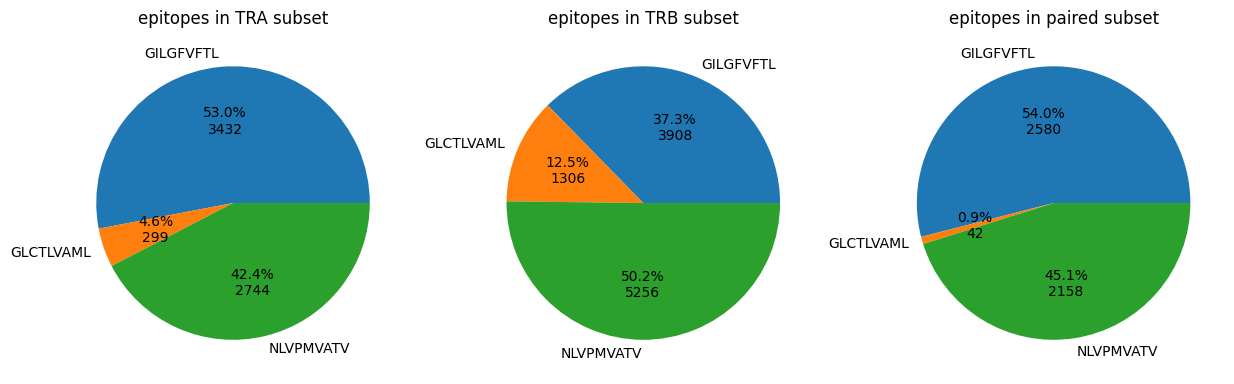

In [138]:
def absolute_func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n{absolute}"


fig, axes = plt.subplots(1,3, figsize=[15,5])
d = pd.DataFrame(data[~data['a_cdr3aa'].isna()][label].value_counts()).reset_index().sort_values(label)
axes[0].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[0].set_title('epitopes in TRA subset')

d = pd.DataFrame(data[~data['b_cdr3aa'].isna()][label].value_counts()).reset_index().sort_values(label)
axes[1].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[1].set_title('epitopes in TRB subset')

d = pd.DataFrame(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'])][label].value_counts()).reset_index().sort_values(label)
axes[2].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[2].set_title('epitopes in paired subset')

## Distance table

In [139]:
dists_res = pd.read_csv(f'{results_path}tcremp_dists_{chain}.txt', sep='\t')

In [140]:
dists_res.head(10)

,tcremp_id,cloneId,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,b_j,antigen.epitope,a_0_v,...,b_6_cdr3,b_7_v,b_7_j,b_7_cdr3,b_8_v,b_8_j,b_8_cdr3,b_9_v,b_9_j,b_9_cdr3
0,0,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
1,1,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
2,2,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
3,3,341,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-30.0,140.0,43.0,-90.0,117.0,81.0,-20.0
4,4,720,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,165.0,...,-70.0,145.0,25.0,-70.0,147.0,80.0,-10.0,137.0,43.0,-10.0
5,5,87,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,TRBJ1-2*01,GLCTLVAML,161.0,...,-80.0,62.0,25.0,0.0,98.0,80.0,-80.0,97.0,43.0,-90.0
6,6,241,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,165.0,...,-60.0,196.0,32.0,-20.0,294.0,28.0,-10.0,292.0,50.0,-50.0
7,7,489,CAGPGGSSNTGKLIF,TRAV35*01,TRAJ37*01,CASSLIYPGELFF,TRBV27*01,TRBJ2-2*01,GILGFVFTL,140.0,...,-90.0,156.0,33.0,10.0,147.0,33.0,-60.0,103.0,28.0,10.0
8,8,351,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-50.0,169.0,33.0,-40.0,140.0,43.0,-110.0,117.0,81.0,-20.0
9,9,233,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,165.0,...,-80.0,169.0,33.0,-70.0,140.0,43.0,-110.0,117.0,81.0,-20.0


## PCA

In [141]:
pca_res = pd.read_csv(f'{results_path}tcremp_pca_{chain}.txt', sep='\t')
pca_res.head(10)

,tcremp_id,cloneId,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,b_j,antigen.epitope,PC0,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-172.065787,...,51.603367,52.704850,-166.056762,-15.791514,174.787663,118.087248,160.288239,17.925699,-25.106444,141.906208
1,1,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-172.065787,...,51.603367,52.704850,-166.056762,-15.791514,174.787663,118.087248,160.288239,17.925699,-25.106444,141.906208
2,2,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-172.065787,...,51.603367,52.704850,-166.056762,-15.791514,174.787663,118.087248,160.288239,17.925699,-25.106444,141.906208
3,3,341,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-186.396797,...,55.889550,50.550698,-171.382538,3.710250,172.307289,114.663165,148.022129,40.319756,-27.048885,139.100193
4,4,720,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,-28.150587,...,36.796393,126.473958,-203.565566,-56.253787,96.957710,118.217587,143.975415,-152.882679,-29.448018,239.965358
5,5,87,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,TRBJ1-2*01,GLCTLVAML,215.762365,...,-18.895826,107.181151,-180.571543,-12.747924,125.736143,91.001929,50.038612,-12.665238,-33.928386,166.023782
6,6,241,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,18.261052,...,8.397371,24.631374,-219.329753,2.251036,67.473604,57.802675,79.053139,-29.906180,-25.646065,102.485456
7,7,489,CAGPGGSSNTGKLIF,TRAV35*01,TRAJ37*01,CASSLIYPGELFF,TRBV27*01,TRBJ2-2*01,GILGFVFTL,-283.720031,...,69.808044,-68.062042,-211.565918,11.257114,152.795607,289.448652,134.814347,-27.809814,-33.159532,249.497526
8,8,351,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-263.641819,...,36.341602,-48.182748,-175.699572,50.718460,92.316678,210.147055,98.783557,-31.483421,31.448166,117.136666
9,9,233,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-197.985462,...,152.277706,42.339921,-166.698117,36.545369,99.465735,93.502706,92.252825,37.993553,-37.080187,186.105153


## t-SNE

In [142]:
tsne_res = pd.read_csv(f'{results_path}tcremp_tsne_{chain}.txt', sep='\t')
tsne_res.head(10)

,tcremp_id,cloneId,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,b_j,antigen.epitope,DM1,DM2
0,0,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-37.028070,15.994097
1,1,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-37.028070,15.994097
2,2,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-36.351310,17.021355
3,3,341,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-38.616768,18.310623
4,4,720,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,-18.311579,27.350658
5,5,87,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,TRBJ1-2*01,GLCTLVAML,64.109210,-24.980522
6,6,241,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,38.323982,26.651000
7,7,489,CAGPGGSSNTGKLIF,TRAV35*01,TRAJ37*01,CASSLIYPGELFF,TRBV27*01,TRBJ2-2*01,GILGFVFTL,-44.279090,-34.993840
8,8,351,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-35.603306,-46.705250
9,9,233,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-47.824000,19.641357


Text(0.5, 1.0, 'TSNE representation')

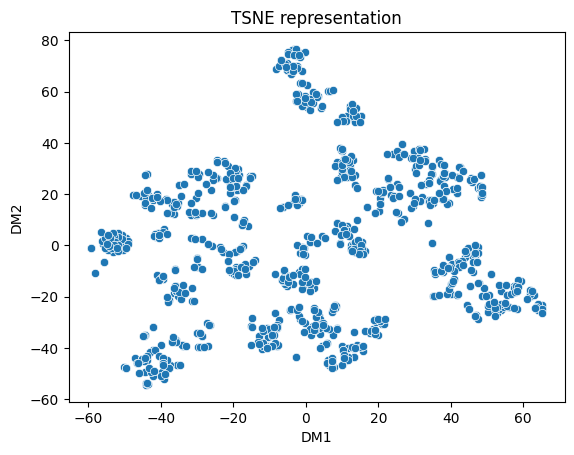

In [143]:
sns.scatterplot(x='DM1', y='DM2', data=tsne_res).set_title('TSNE representation')

Text(0.5, 1.0, 'TSNE representation colored by epitope')

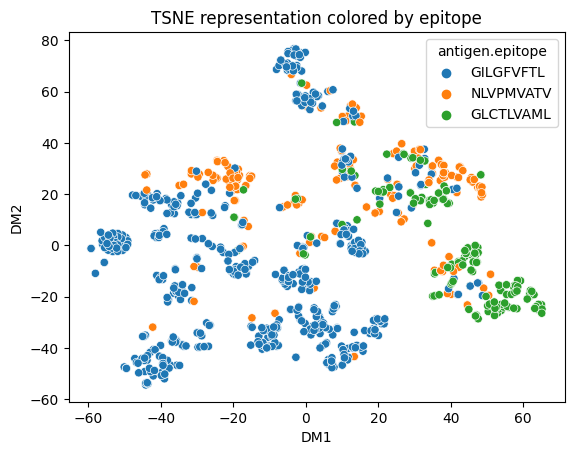

In [144]:
sns.scatterplot(x='DM1', y='DM2', data=tsne_res, hue='antigen.epitope').set_title('TSNE representation colored by epitope')

## Clustering

In [145]:
clstr_res = pd.read_csv(f'{results_path}tcremp_clstr_res_{chain}.txt', sep='\t')
clstr_res['cluster'] = clstr_res['cluster'].astype(str)
clstr_res.head(10)

,tcremp_id,cloneId,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,b_j,antigen.epitope,cluster,label_cluster
0,0,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
1,1,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
2,2,343,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
3,3,341,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
4,4,720,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,1,NLVPMVATV
5,5,87,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,TRBJ1-2*01,GLCTLVAML,2,GLCTLVAML
6,6,241,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,4,NLVPMVATV
7,7,489,CAGPGGSSNTGKLIF,TRAV35*01,TRAJ37*01,CASSLIYPGELFF,TRBV27*01,TRBJ2-2*01,GILGFVFTL,5,GILGFVFTL
8,8,351,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
9,9,233,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no


Text(0.5, 1.0, 'tsne colored by cluster label')

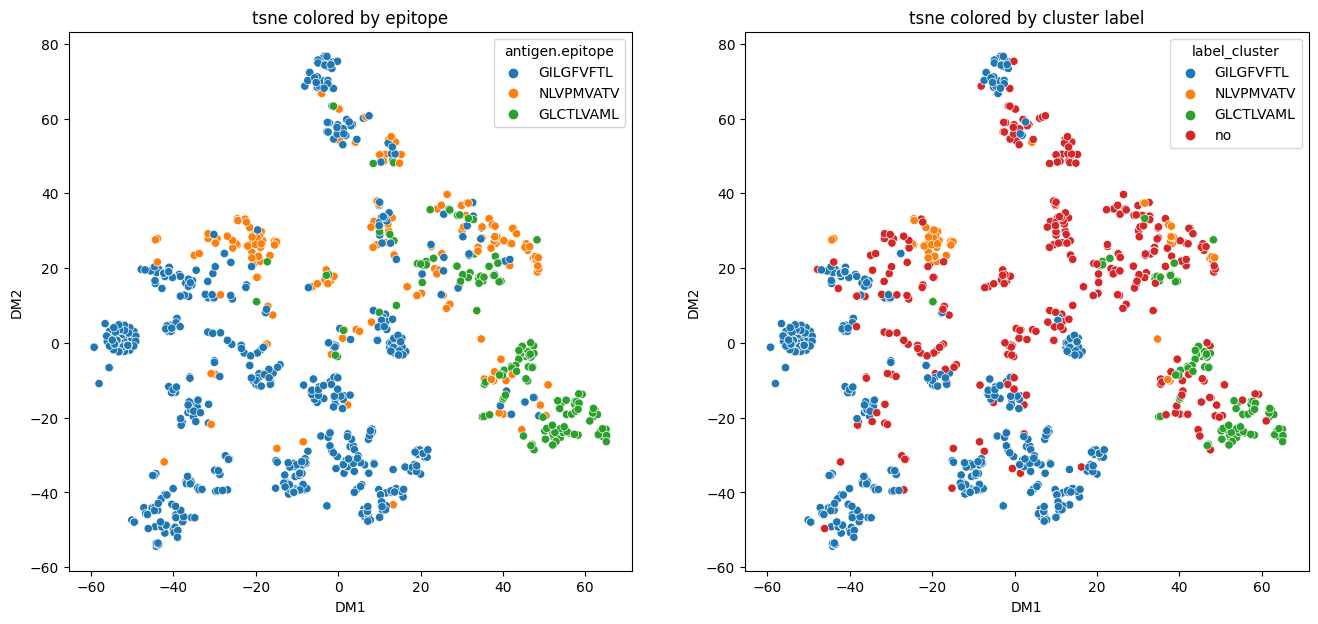

In [146]:
fig, axes = plt.subplots(1,2, figsize=[16,7])
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['cloneId','DM1','DM2']]), hue='antigen.epitope', ax = axes[0])
axes[0].set_title('tsne colored by epitope')
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['cloneId','DM1','DM2']]), hue='label_cluster', ax = axes[1])
axes[1].set_title('tsne colored by cluster label')

In [147]:
clstr_res[clstr_res['cluster']=='-1']

,tcremp_id,cloneId,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,b_j,antigen.epitope,cluster,label_cluster
9,9,233,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no
10,10,38,CAASFIIQGAQKLVF,TRAV13-1*01,TRAJ54*01,CASSLLGGWSEAFF,TRBV27*01,TRBJ1-1*01,GILGFVFTL,-1,no
14,14,781,CATVGTASKLTF,TRAV17*01,TRAJ44*01,CASSLWLNEQFF,TRBV7-2*01,TRBJ2-1*01,NLVPMVATV,-1,no
17,17,208,CAESSASKIIF,TRAV5*01,TRAJ3*01,CASSHDPTWGPGNTIYF,TRBV3-1*01,TRBJ1-3*01,NLVPMVATV,-1,no
18,18,666,CALSPRTQGGSEKLVF,TRAV19*01,TRAJ57*01,CASSLASPGHFTGELFF,TRBV7-6*01,TRBJ2-2*01,NLVPMVATV,-1,no
...,...,...,...,...,...,...,...,...,...,...,...
942,942,647,CALSEGGKLIF,TRAV19*01,TRAJ23*01,CASRDLREGDYGYTF,TRBV19*01,TRBJ1-2*01,GILGFVFTL,-1,no
946,946,771,CATENIRDDKIIF,TRAV17*01,TRAJ30*01,CSARAWDRAQATNEKLFF,TRBV20-1*01,TRBJ1-4*01,GILGFVFTL,-1,no
948,948,569,CAGVHGSGNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSAWAQHF,TRBV19*01,TRBJ1-5*01,GILGFVFTL,-1,no
952,952,736,CASPDVTTDSWGKFQF,TRAV24*01,TRAJ24*01,CASSIFSGRENEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no


In [148]:
#clstr_res.merge(tsne_res[['cloneId','DM1','DM2']])[['DM1','DM2','cluster']].apply(lambda x : plt.text(x['DM1'],x['DM2'],x['cluster'], ha="center", va="center"),axis=1)

<Axes: xlabel='DM1', ylabel='DM2'>

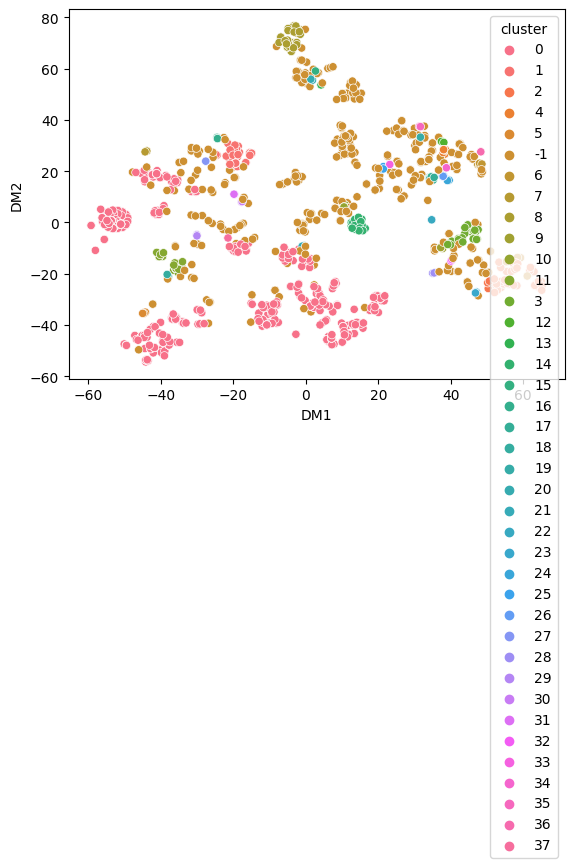

In [149]:
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['cloneId','DM1','DM2']]), hue='cluster')

## Confusion Matrix 

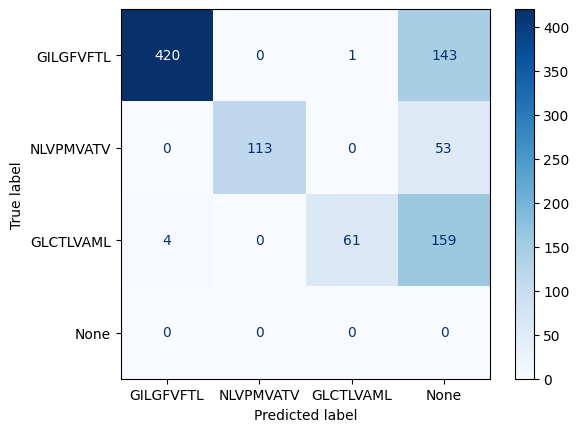

In [150]:
cm = confusion_matrix(clstr_res[label],clstr_res['label_cluster'])
ConfusionMatrixDisplay(cm,display_labels=list(clstr_res[label].drop_duplicates()) + ['None']).plot(cmap=plt.cm.Blues,values_format='g')